In [205]:
!pip install geopy
!pip install yellowbrick
!pip install matplotlip

You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\leano\Desktop\Studium\git\ML\BA_ClusteringofRestaurants\Scripts\python.exe -m pip install --upgrade pip' command.


# Clustering for Vancouver

In [206]:
import pandas as pd
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Data import
## load total income of each Vancouver neighbourhood

In [207]:

income_path = pd.read_csv('dataset_Vancouver/income_Vancouver1.csv', index_col= 'Total income')
df_income = pd.DataFrame(income_path)
df_income.loc['Total',:]= df_income.sum(axis=0)
df_income.head()

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
Under $10.000 (including loss),2790.0,8785.0,3320.0,3185.0,3300.0,4575.0,6595.0,2285.0,4160.0,4960.0,...,2705.0,1190.0,920.0,1530.0,5155.0,4840.0,5920.0,2020.0,86590.0,338730.0
$10.000 to $19.999,1820.0,8050.0,2140.0,3495.0,5305.0,6315.0,8580.0,1650.0,4700.0,4945.0,...,2860.0,665.0,815.0,3430.0,6800.0,5720.0,7225.0,1370.0,95255.0,346355.0
$20.000 to $29.999,1365.0,4830.0,1615.0,3110.0,3420.0,4390.0,5885.0,1295.0,3165.0,3875.0,...,2260.0,650.0,750.0,1080.0,4585.0,3940.0,5685.0,985.0,66640.0,248170.0
$30.000 to $39.999,1110.0,4325.0,1205.0,2955.0,2945.0,3185.0,4820.0,865.0,2570.0,3435.0,...,1870.0,475.0,565.0,575.0,3600.0,3085.0,4925.0,845.0,54720.0,210570.0
$40.000 to $49.999,860.0,4270.0,1130.0,3030.0,2590.0,2580.0,3865.0,795.0,2225.0,3510.0,...,1760.0,490.0,495.0,435.0,2850.0,2360.0,4860.0,785.0,48860.0,188140.0


In [208]:
df_income = df_income.drop(["$100.000 and over"], axis = 0) # drop this row because it contains duplicate information

In [209]:
# add a coloumn with the average income
lst =[]
for i in range(10):
    lst.append(10000*i+5000)
lst.append(125000)
lst.append(250000)
lst.append(sum(lst)/len(lst))
df_income.insert(0,'average income', lst)
df_income

,average income,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
Under $10.000 (including loss),5000.000000,2790.0,8785.0,3320.0,3185.0,3300.0,4575.0,6595.0,2285.0,4160.0,...,2705.0,1190.0,920.0,1530.0,5155.0,4840.0,5920.0,2020.0,86590.0,338730.0
$10.000 to $19.999,15000.000000,1820.0,8050.0,2140.0,3495.0,5305.0,6315.0,8580.0,1650.0,4700.0,...,2860.0,665.0,815.0,3430.0,6800.0,5720.0,7225.0,1370.0,95255.0,346355.0
$20.000 to $29.999,25000.000000,1365.0,4830.0,1615.0,3110.0,3420.0,4390.0,5885.0,1295.0,3165.0,...,2260.0,650.0,750.0,1080.0,4585.0,3940.0,5685.0,985.0,66640.0,248170.0
$30.000 to $39.999,35000.000000,1110.0,4325.0,1205.0,2955.0,2945.0,3185.0,4820.0,865.0,2570.0,...,1870.0,475.0,565.0,575.0,3600.0,3085.0,4925.0,845.0,54720.0,210570.0
$40.000 to $49.999,45000.000000,860.0,4270.0,1130.0,3030.0,2590.0,2580.0,3865.0,795.0,2225.0,...,1760.0,490.0,495.0,435.0,2850.0,2360.0,4860.0,785.0,48860.0,188140.0
$50.000 to $59.999,55000.000000,700.0,3700.0,1025.0,2630.0,1955.0,1895.0,2915.0,680.0,1735.0,...,1310.0,380.0,450.0,385.0,1820.0,1615.0,3825.0,690.0,38355.0,149530.0
$60.000 to $69.999,65000.000000,620.0,3530.0,820.0,2370.0,1545.0,1465.0,1965.0,670.0,1320.0,...,1075.0,350.0,400.0,200.0,1240.0,1065.0,2945.0,500.0,30150.0,115955.0
$70.000 to $79.999,75000.000000,470.0,3115.0,705.0,1980.0,1170.0,1155.0,1490.0,460.0,950.0,...,930.0,270.0,385.0,210.0,780.0,780.0,2385.0,555.0,24120.0,89390.0
$80.000 to $89.999,85000.000000,415.0,2495.0,635.0,1625.0,850.0,730.0,1245.0,370.0,910.0,...,785.0,285.0,315.0,210.0,670.0,640.0,1660.0,450.0,19175.0,71045.0


In [210]:
# calculate the weighted average income
for element in range(len(df_income.columns.values)):
    if element != 0:
        for column in range(len(df_income.iloc[:,element])):
            average = df_income.iloc[column,0]
            total = df_income.iloc[12,element]
            actual_value = df_income.iloc[column,element]
            value = average*actual_value/total
            df_income.iloc[column,element] = value
df_income = df_income.drop('Total', axis=0)
df_income.loc['weighted income average',:]= df_income.sum(axis=0)
df_income = df_income.drop(df_income.index[0:12], axis=0)
df_income = df_income.drop("average income", axis=1)
df_income

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total income,,,,,,,,,,,,,,,,,,,,,
weighted income average,47217.03198,51284.256208,56365.998515,52891.735782,40686.166299,36934.324866,37351.52864,52571.375603,38091.365462,52816.779837,...,47979.186834,59965.034965,52622.329428,30537.09856,33393.537697,33745.027467,43594.705758,55511.701706,43984.429986,42390.245264


## load citizenship dataset of Vancouver

In [211]:

citizen_path = pd.read_csv('dataset_Vancouver/citizenship_Vancouver1.csv'  )
df_citizen = pd.DataFrame(citizen_path)
df_citizen

,ID,Total - Selected places of birth for the immigrant population in private households,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
0,2583,Americas,390.0,2445.0,785.0,1465.0,1050.0,1110.0,1285.0,305.0,...,585.0,195.0,220.0,340.0,935.0,665.0,2545.0,550.0,20600.0,65330.0
1,2584,Brazil,15.0,190.0,20.0,105.0,55.0,50.0,50.0,0.0,...,10.0,0.0,10.0,0.0,35.0,30.0,230.0,10.0,1030.0,2855.0
2,2585,Colombia,20.0,160.0,20.0,50.0,35.0,45.0,85.0,0.0,...,25.0,10.0,0.0,0.0,50.0,55.0,110.0,20.0,950.0,3080.0
3,2586,El Salvador,0.0,25.0,10.0,25.0,65.0,110.0,115.0,0.0,...,15.0,0.0,0.0,30.0,125.0,130.0,85.0,0.0,1125.0,4400.0
4,2587,Guyana,0.0,25.0,10.0,15.0,15.0,15.0,10.0,0.0,...,10.0,0.0,10.0,10.0,25.0,10.0,35.0,0.0,255.0,920.0
5,2588,Haiti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,260.0
6,2589,Jamaica,25.0,35.0,25.0,45.0,0.0,20.0,25.0,15.0,...,10.0,0.0,10.0,0.0,40.0,30.0,65.0,10.0,485.0,2230.0
7,2590,Mexico,10.0,440.0,70.0,190.0,125.0,130.0,145.0,40.0,...,40.0,30.0,15.0,50.0,90.0,85.0,570.0,45.0,2760.0,7855.0
8,2591,Peru,25.0,85.0,20.0,50.0,20.0,65.0,75.0,0.0,...,30.0,20.0,0.0,10.0,25.0,35.0,55.0,35.0,790.0,2695.0
9,2592,Trinidad and Tobago,15.0,30.0,10.0,45.0,10.0,10.0,30.0,10.0,...,10.0,0.0,10.0,10.0,50.0,15.0,65.0,0.0,455.0,1940.0


# Preprocessing

In [212]:
df_citizen.drop(['ID'], axis=1, inplace=True)
# get the transposed dataset
df_citizen = df_citizen.transpose()
df_citizen.columns = df_citizen.iloc[0]
#remove first row from DataFrame
df_citizen = df_citizen[1:]
df_citizen

Total - Selected places of birth for the immigrant population in private households,Americas,Brazil,Colombia,El Salvador,Guyana,Haiti,Jamaica,Mexico,Peru,Trinidad and Tobago,...,Lebanon,Pakistan,Philippines,Sri Lanka,Syria,Taiwan,Viet Nam,Other places of birth in Asia,Oceania and other places of birth,Canadian citizens
Arbutus-Ridge,390.0,15.0,20.0,0.0,0.0,0.0,25.0,10.0,25.0,15.0,...,15.0,10.0,105.0,10.0,20.0,620.0,30.0,235.0,85.0,12200.0
Downtown,2445.0,190.0,160.0,25.0,25.0,0.0,35.0,440.0,85.0,30.0,...,40.0,80.0,795.0,55.0,40.0,910.0,230.0,1310.0,360.0,46725.0
Dunbar-Southlands,785.0,20.0,20.0,10.0,10.0,0.0,25.0,70.0,20.0,10.0,...,10.0,10.0,170.0,25.0,0.0,580.0,20.0,290.0,155.0,18190.0
Fairview,1465.0,105.0,50.0,25.0,15.0,0.0,45.0,190.0,50.0,45.0,...,25.0,35.0,450.0,10.0,10.0,420.0,45.0,420.0,275.0,29025.0
Grandview-Woodland,1050.0,55.0,35.0,65.0,15.0,0.0,0.0,125.0,20.0,10.0,...,15.0,25.0,590.0,15.0,10.0,70.0,515.0,205.0,235.0,26525.0
Hastings-Sunrise,1110.0,50.0,45.0,110.0,15.0,0.0,20.0,130.0,65.0,10.0,...,0.0,15.0,1245.0,45.0,15.0,165.0,1540.0,590.0,250.0,30585.0
Kensington-Cedar Cottage,1285.0,50.0,85.0,115.0,10.0,0.0,25.0,145.0,75.0,30.0,...,10.0,50.0,4385.0,225.0,20.0,225.0,2585.0,710.0,475.0,42755.0
Kerrisdale,305.0,0.0,0.0,0.0,0.0,0.0,15.0,40.0,0.0,10.0,...,25.0,10.0,235.0,0.0,0.0,615.0,40.0,180.0,75.0,11670.0
Killarney,855.0,35.0,70.0,90.0,25.0,0.0,0.0,85.0,65.0,35.0,...,0.0,55.0,2015.0,60.0,0.0,535.0,770.0,860.0,215.0,25435.0
Kitsilano,1905.0,60.0,70.0,35.0,15.0,0.0,40.0,190.0,50.0,25.0,...,30.0,40.0,250.0,35.0,20.0,300.0,95.0,485.0,415.0,36945.0


In [213]:
# put together places of birth of South-east- Asians, Japanese, Europeans, Western, ..
df_citizen['Total Population'] = df_citizen.iloc[:,0]+df_citizen.iloc[:,12]+df_citizen.iloc[:,30]+df_citizen.iloc[:,40]++df_citizen.iloc[:,59]

'''df_citizen['Percentage of Canadians'] = (df_citizen.iloc[:,59] / df_citizen['Total Population']) * 100
df_citizen['Percentage of Latin-Americans'] = (df_citizen.iloc[:,1:9].sum(axis=1)+df_citizen.iloc[:,11] )/ df_citizen['Total Population'] * 100
df_citizen['Percentage of Europeans'] = (df_citizen.iloc[:,12] / df_citizen['Total Population']) * 100
df_citizen['Percentage of US-Americans'] = (df_citizen.iloc[:,10] / df_citizen['Total Population']) * 100
'''
# Western citizens contain Canadians+ US-Americans + Europeans
df_citizen['Percentage of Western'] = ((df_citizen.iloc[:,10] +df_citizen.iloc[:,59]+df_citizen.iloc[:,10]) / df_citizen['Total Population']) * 100
df_citizen['Percentage of Asians'] = (df_citizen.iloc[:,40] / df_citizen['Total Population']) * 100
df_citizen['Percentage of Japanese'] = (df_citizen.iloc[:,48]/ df_citizen['Total Population']) * 100
df_citizen['Percentage of Chinese'] = (df_citizen.iloc[:,43]/ df_citizen['Total Population']) * 100
df_citizen['Percentage of South-East-Asians'] = ((df_citizen.iloc[:,56]+df_citizen.iloc[:,52]) / df_citizen['Total Population']) * 100

df_citizen.drop(df_citizen.iloc[:,0:60], axis=1, inplace=True)
df_citizen.head()

Total - Selected places of birth for the immigrant population in private households,Total Population,Percentage of Western,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians
Arbutus-Ridge,19850.0,63.879093,30.327456,0.478589,16.75063,0.680101
Downtown,69965.0,69.884942,20.453084,0.850425,4.766669,1.465018
Dunbar-Southlands,26000.0,74.076923,19.961538,0.307692,11.384615,0.730769
Fairview,38320.0,79.893006,10.529749,0.626305,2.479123,1.291754
Grandview-Woodland,34005.0,81.179238,11.704161,0.426408,4.955154,3.249522


In [214]:
df_citizen = df_citizen.transpose()
df_citizen

,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,Kitsilano,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
Total - Selected places of birth for the immigrant population in private households,,,,,,,,,,,,,,,,,,,,,
Total Population,19850.0,69965.0,26000.0,38320.0,34005.0,45635.0,64890.0,18230.0,40335.0,48105.0,...,27800.0,10215.0,9365.0,12675.0,48910.0,43765.0,51740.0,15520.0,783285.0,3068785.0
Percentage of Western,63.879093,69.884942,74.076923,79.893006,81.179238,68.57675,67.321621,66.15469,64.100657,81.685895,...,75.755396,67.792462,75.173518,72.583826,60.866898,59.808066,73.705064,74.903351,69.502161,70.25647
Percentage of Asians,30.327456,20.453084,19.961538,10.529749,11.704161,25.035609,27.985822,29.676358,30.593777,8.138447,...,18.866906,26.284875,18.84677,22.327416,35.831118,36.318976,12.63046,17.783505,23.83679,22.722511
Percentage of Japanese,0.478589,0.850425,0.307692,0.626305,0.426408,0.273913,0.377562,0.521119,0.42147,0.592454,...,0.593525,0.293686,0.800854,0.315582,0.21468,0.239918,1.246618,0.676546,0.535565,0.34802
Percentage of Chinese,16.75063,4.766669,11.384615,2.479123,4.955154,12.424674,10.718138,15.03017,10.251642,2.068392,...,5.57554,14.145864,5.125467,13.491124,5.694132,15.343311,1.48821,9.954897,8.522441,6.157649
Percentage of South-East-Asians,0.680101,1.465018,0.730769,1.291754,3.249522,6.102772,10.741254,1.508502,6.904673,0.717181,...,5.773381,1.125795,2.295782,3.905325,10.805561,8.614189,1.575184,0.354381,5.15968,3.933479


In [215]:
df_new = pd.concat([df_citizen,df_income])
df_new = df_new.transpose()
lst = list(df_new.index)
for element in lst:
    df_new.loc[element, 'Neighbourhood'] = element + ',Vancouver,BC,Canada'
df_new = df_new.drop(df_new.index[23])
df_new = df_new.drop(df_new.index[22])
df_new

,Total Population,Percentage of Western,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians,weighted income average,Neighbourhood
Arbutus-Ridge,19850.0,63.879093,30.327456,0.478589,16.75063,0.680101,47217.03198,"Arbutus-Ridge ,Vancouver,BC,Canada"
Downtown,69965.0,69.884942,20.453084,0.850425,4.766669,1.465018,51284.256208,"Downtown ,Vancouver,BC,Canada"
Dunbar-Southlands,26000.0,74.076923,19.961538,0.307692,11.384615,0.730769,56365.998515,"Dunbar-Southlands ,Vancouver,BC,Canada"
Fairview,38320.0,79.893006,10.529749,0.626305,2.479123,1.291754,52891.735782,"Fairview ,Vancouver,BC,Canada"
Grandview-Woodland,34005.0,81.179238,11.704161,0.426408,4.955154,3.249522,40686.166299,"Grandview-Woodland ,Vancouver,BC,Canada"
Hastings-Sunrise,45635.0,68.57675,25.035609,0.273913,12.424674,6.102772,36934.324866,"Hastings-Sunrise ,Vancouver,BC,Canada"
Kensington-Cedar Cottage,64890.0,67.321621,27.985822,0.377562,10.718138,10.741254,37351.52864,"Kensington-Cedar Cottage ,Vancouver,BC,Canada"
Kerrisdale,18230.0,66.15469,29.676358,0.521119,15.03017,1.508502,52571.375603,"Kerrisdale ,Vancouver,BC,Canada"
Killarney,40335.0,64.100657,30.593777,0.42147,10.251642,6.904673,38091.365462,"Killarney ,Vancouver,BC,Canada"
Kitsilano,48105.0,81.685895,8.138447,0.592454,2.068392,0.717181,52816.779837,"Kitsilano ,Vancouver,BC,Canada"


In [216]:
# get location of Vanocuver using geopy
from geopy.geocoders import Nominatim
address = 'Vancouver'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Vancouver are {}, {}".format(latitude, longitude))


The geographical coordinates of Vancouver are 49.2608724, -123.113952


In [217]:
'''
 Geopy provides a class for popular mapping services. Nominatim is the service behind the popular OpenStreetMap that allows you to geocode for free. But you should comply with the usage policies in order to allow everyone to use it:
'''
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="http")

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


In [218]:
# 2- - create location column
df_new['location'] = df_new['Neighbourhood'].apply(geocode)

In [219]:
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_new['point'] = df_new['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [220]:
# 4 - split point column into latitude, longitude and altitude columns
df_new[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_new['point'].tolist(), index=df_new.index)
df_new

,Total Population,Percentage of Western,Percentage of Asians,Percentage of Japanese,Percentage of Chinese,Percentage of South-East-Asians,weighted income average,Neighbourhood,location,point,latitude,longitude,altitude
Arbutus-Ridge,19850.0,63.879093,30.327456,0.478589,16.75063,0.680101,47217.03198,"Arbutus-Ridge ,Vancouver,BC,Canada","(Arbutus-Ridge, Vancouver, Metro Vancouver Reg...","(49.2462132, -123.1612616, 0.0)",49.246213,-123.161262,0.0
Downtown,69965.0,69.884942,20.453084,0.850425,4.766669,1.465018,51284.256208,"Downtown ,Vancouver,BC,Canada","(Downtown, Vancouver, Metro Vancouver Regional...","(49.283393, -123.1174563, 0.0)",49.283393,-123.117456,0.0
Dunbar-Southlands,26000.0,74.076923,19.961538,0.307692,11.384615,0.730769,56365.998515,"Dunbar-Southlands ,Vancouver,BC,Canada","(Dunbar-Southlands, Vancouver, Metro Vancouver...","(49.237068550000004, -123.18436532910083, 0.0)",49.237069,-123.184365,0.0
Fairview,38320.0,79.893006,10.529749,0.626305,2.479123,1.291754,52891.735782,"Fairview ,Vancouver,BC,Canada","(Fairview, Vancouver, Metro Vancouver Regional...","(49.2619557, -123.13035055885713, 0.0)",49.261956,-123.130351,0.0
Grandview-Woodland,34005.0,81.179238,11.704161,0.426408,4.955154,3.249522,40686.166299,"Grandview-Woodland ,Vancouver,BC,Canada","(Grandview-Woodland, Vancouver, Metro Vancouve...","(49.277138750000006, -123.06690083513674, 0.0)",49.277139,-123.066901,0.0
Hastings-Sunrise,45635.0,68.57675,25.035609,0.273913,12.424674,6.102772,36934.324866,"Hastings-Sunrise ,Vancouver,BC,Canada","(Hastings-Sunrise, Vancouver, Metro Vancouver ...","(49.278752, -123.04000581430353, 0.0)",49.278752,-123.040006,0.0
Kensington-Cedar Cottage,64890.0,67.321621,27.985822,0.377562,10.718138,10.741254,37351.52864,"Kensington-Cedar Cottage ,Vancouver,BC,Canada","(Kensington-Cedar Cottage, Vancouver, Metro Va...","(49.2476321, -123.0842067, 0.0)",49.247632,-123.084207,0.0
Kerrisdale,18230.0,66.15469,29.676358,0.521119,15.03017,1.508502,52571.375603,"Kerrisdale ,Vancouver,BC,Canada","(Kerrisdale, Vancouver, Metro Vancouver Region...","(49.2209848, -123.1595483795563, 0.0)",49.220985,-123.159548,0.0
Killarney,40335.0,64.100657,30.593777,0.42147,10.251642,6.904673,38091.365462,"Killarney ,Vancouver,BC,Canada","(Killarney, Vancouver, Metro Vancouver Regiona...","(49.2242738, -123.0462504, 0.0)",49.224274,-123.046250,0.0
Kitsilano,48105.0,81.685895,8.138447,0.592454,2.068392,0.717181,52816.779837,"Kitsilano ,Vancouver,BC,Canada","(Kitsilano, Vancouver, Metro Vancouver Regiona...","(49.2694099, -123.155267, 0.0)",49.269410,-123.155267,0.0


In [221]:
# Folium mapping
import folium
map_Vancouver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_new['latitude'], df_new['longitude'], df_new['Neighbourhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Vancouver)

map_Vancouver

# preprocessing of Restaurant dataset
## load restaurants of Vancouver dataset

In [222]:
rest_path = pd.read_csv('dataset_Vancouver/Vancouver_restaurant_data.csv', encoding="latin")
df_rest = pd.DataFrame(rest_path)
df_rest.head()

,Name of Restaurent,Type of Cusine,Rating,Total No of Ratings,Cost,Landmark,Opening time,Current Status,Dine in availability,Takeaway type,Delivery availability,Location and Address,Description of the Restaurent,Restaurent Name,Rating.1,number-of-reviews,veg /Non- Veg
0,Las Tortas Mexican,Restaurant,4.5,287,NaN,3353 Cambie Street,11:30AM,Closed,Dine-in,Takeaway,Delivery,NaN,NaN,NaN,NaN,NaN,Non-Veg
1,The Story Cafe -,Restaurant,4.7,154,NaN,2800 Sexsmith Road,9AM,Closed,Dine-in,Takeaway,Delivery,NaN,NaN,NaN,NaN,NaN,Non-Veg
2,Miku Vancouver,Sushi,4.6,"4,201",Expensive,NaN,11:30AM,Closed,NaN,NaN,NaN,200 Granville St # 70 ú In the Granville Square,Sushi & sustainable seafood are served in a so...,NaN,NaN,NaN,Non-Veg
3,Blue Water Cafe,Seafood,4.6,"1,822",Too Expensive,NaN,4:30PM,Closed,Dine-in,Takeaway,Delivery,1095 Hamilton St ú In Urban Systems,Destination in a heritage warehouse space offe...,Blue Water Cafe,4.6,(1822),Non-Veg
4,Chambar Restaurant,Restaurant,4.4,"2,736",Expensive,NaN,11:30AM,Closed,Dine-in,Takeaway,Delivery,568 Beatty St,Chic exposed-brick space serving creative Belg...,Chambar Restaurant,4.4,(2736),Non-Veg


In [223]:
# drop unuseful features
df_rest.drop(['Rating.1', 'number-of-reviews','veg /Non- Veg','Rating','Total No of Ratings','Current Status','Opening time','Dine in availability','Takeaway type','Delivery availability','Description of the Restaurent','Restaurent Name','Cost'], axis=1, inplace=True)
df_rest.head()


,Name of Restaurent,Type of Cusine,Landmark,Location and Address
0,Las Tortas Mexican,Restaurant,3353 Cambie Street,NaN
1,The Story Cafe -,Restaurant,2800 Sexsmith Road,NaN
2,Miku Vancouver,Sushi,NaN,200 Granville St # 70 ú In the Granville Square
3,Blue Water Cafe,Seafood,NaN,1095 Hamilton St ú In Urban Systems
4,Chambar Restaurant,Restaurant,NaN,568 Beatty St


In [224]:
 # there are duplicates in the dataframe -> remove them
df_rest[df_rest.duplicated(keep = False)]

,Name of Restaurent,Type of Cusine,Landmark,Location and Address
140,Earls Kitchen + Bar,Restaurant,NaN,"Vancouver, BC, Canada"
180,Earls Kitchen + Bar,Restaurant,NaN,"Vancouver, BC, Canada"
293,A&W Canada,Hamburger,NaN,"Vancouver, BC, Canada"
295,A&W Canada,Hamburger,NaN,"Vancouver, BC, Canada"


In [225]:
df_rest = df_rest.drop_duplicates() # removes all duplicates
df_rest.reset_index(drop=True, inplace=True)
df_rest[df_rest.duplicated(keep = False)]

,Name of Restaurent,Type of Cusine,Landmark,Location and Address


In [226]:
# merge place and landmark, since they have the same meaning

# first: replace nan with ''
values = {"Landmark": '', "Location and Address": ''}
df_rest = df_rest.fillna(value = values)

# now create a new column containing of the values Landmark and Location and Address
df_rest['Place'] = df_rest['Landmark'] + df_rest['Location and Address']
df_rest.drop(['Landmark'], axis=1, inplace=True)
df_rest.drop(['Location and Address'], axis=1, inplace=True)

df_rest.shape

(382, 3)

In [227]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Restaurant                    73
Indian                        27
Italian                       22
Seafood                       14
Japanese                      13
                              ..
Latin American                 1
Lebanese                       1
No reviews Business broker     1
No reviews Hotel               1
Yakiniku                       1
Length: 95, dtype: int64

In [228]:
# problem: Type of cuisine "Restaurant" doesn't have a meaning
# -> remove it and replace it with a more meaningful category
cnt = 0
for element in range(len(df_rest["Type of Cusine"])):
    rest_name = ""
    if df_rest.loc[element,"Type of Cusine"] == "Restaurant":
        rest_name = df_rest.loc[element,"Name of Restaurent "]
        if (re.search("Mexican",rest_name)) or (re.search("Taco",rest_name)) or re.search("Brazil",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Latin"
        elif (re.search("French",rest_name)) or re.search("Italian",rest_name) or re.search("Steak",rest_name) or re.search("Provence",rest_name) or re.search("Mangez",rest_name) or re.search("Mediterran",rest_name) or re.search("Pizza",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Western"
        elif (re.search("Asia",rest_name)) or re.search("Thai",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Asian"
        elif re.search("Ramen",rest_name):
            df_rest.loc[element,"Type of Cusine"] = "Japanese"
        else:
            df_rest = df_rest.drop(df_rest.index[[element-cnt]])
            cnt += 1
df_rest.reset_index(drop=True, inplace=True)
print(df_rest.shape)

(325, 3)


In [229]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Indian                        27
Italian                       22
Japanese                      14
Seafood                       14
Hotel                         11
                              ..
Latin American                 1
Lebanese                       1
No reviews Business broker     1
No reviews Hotel               1
Yakiniku                       1
Length: 97, dtype: int64

In [230]:
# put type of cuisines together
cnt = 0
for element in range(len(df_rest["Type of Cusine"])):
    type = df_rest.loc[element,"Type of Cusine"]
    if (re.search("French",type)) or re.search("Italian",type) or re.search("Vegetarian",type) or re.search("European",type) or re.search("Steak",type) or re.search("Mediterran",type) or re.search("Pizza",type)  or re.search("Hawaii",type)  or re.search("Americ",type) or re.search("Canad",type)  or re.search("Salad",type)  or re.search("Spanish",type)  or re.search("Tapas",type)   or re.search("Pacific Northwest",type) or re.search("German",type) or re.search("Irish",type) or re.search("cois",type) or re.search("Tuscan",type) or re.search("Continental",type) or re.search("Hamburger",type) or re.search("Fast",type) or re.search("Cantonese",type) or re.search("Breakfast",type) or re.search("Sandwich",type):
        df_rest.loc[element,"Type of Cusine"] = "Western Restaurant"

    elif (re.search("Asia",type)) or re.search("Cambodia",type) or re.search("Pho",type) or re.search("Fusion",type) or re.search("Thai",type) or re.search("Vietnamese",type) or re.search("Lebanese",type) or re.search("Afgha",type) or re.search("Ethiop",type) or re.search("Persia",type):
        df_rest.loc[element,"Type of Cusine"] = "Asian Restaurant"

    elif re.search("Ramen",type) or re.search("Sushi",type) or re.search("Terri",type) or re.search("Izakaya",type) or re.search("Yakin",type) or re.search("Japanese",type) or re.search("Teppan",type)  or re.search("Seafood",type):
        df_rest.loc[element,"Type of Cusine"] = "Japanese Restaurant"

    elif re.search("Chines",type):
        df_rest.loc[element,"Type of Cusine"] = "Chinese Restaurant"

    else:
        df_rest = df_rest.drop(df_rest.index[[element-cnt]])
        cnt += 1
df_rest.reset_index(drop=True, inplace=True)

In [231]:
df_rest.value_counts(df_rest["Type of Cusine"])

Type of Cusine
Western Restaurant     97
Japanese Restaurant    48
Asian Restaurant       21
Chinese Restaurant     11
dtype: int64

In [232]:
df_rest.shape

(177, 3)

In [233]:
df_rest.value_counts(df_rest["Place"])

Place
Vancouver, BC, Canada                                     82
West Vancouver, BC, Canada                                 4
Richmond, BC, Canada                                       3
Vancouver, BC, Canada ú Near the Vancouver Art Gallery     2
North Vancouver, BC, Canada                                2
                                                          ..
2149 Commercial Dr                                         1
200 Granville St # 70 ú In the Granville Square            1
1949 Kingsway                                              1
1829 Robson St                                             1
vancouver, BC, Canada                                      1
Length: 89, dtype: int64

In [234]:
for row in range(len(df_rest)):
    rest = df_rest.loc[row,'Name of Restaurent ']
    address = df_rest.loc[row,'Place']
    if address == "Vancouver, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",Vancouver, BC, Canada"
    elif address == "Richmond, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",Richmond, BC, Canada"
    elif address == "West Vancouver, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",West Vancouver, BC, Canada"

In [235]:
# put addresses in a proper way so that we can feed it into geopy
for row in range(len(df_rest)):
    address = df_rest.loc[row,'Place']
    address_lst = []
    if address.find("ú In") != -1:
        address_lst = address.split("ú In")
        if address_lst[0] == "Vancouver,BC,Canada":
            df_rest.loc[row,"Place"] = address_lst[1] + ", Vancouver,BC, CA"
        else:
            df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("ú Near") != -1:
        address_lst = address.split("ú Near")
        df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("#") != -1:
        address_lst = address.split("#")
        df_rest.loc[row,"Place"] = address_lst[0] + ",Vancouver, BC, Canada"
    elif address.find("ancouver") != -1:
        df_rest.loc[row,"Place"] = "Vancouver, BC, Canada"
    elif address.find("BC, Canada") == -1 :
        df_rest.loc[row,"Place"] = address + ",Vancouver, BC, Canada"
df_rest.reset_index(drop=True, inplace=True)


In [236]:
for row in range(len(df_rest)):
    address = df_rest.loc[row,'Place']
    if address.find("#") != -1:
        address_a = re.sub(r"# \d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("Suite") != -1:
        address_a = re.sub(r"Suite \d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("St") != -1:
        address_a = re.sub(r"g\d+", '', address)
        df_rest.loc[row,"Place"] = address_a
    elif address.find("Vancouver, BC, Canada ,Vancouver, BC, Canada") != -1:
        df_rest.loc[row,"Place"] = "Vancouver, BC, Canada"

In [237]:
for row in range(len(df_rest)):
    rest = df_rest.loc[row,'Name of Restaurent ']
    address = df_rest.loc[row,'Place']
    if address == "Vancouver, BC, Canada":
        df_rest.loc[row,'Place'] = rest + ",Vancouver, BC, Canada"

In [238]:
df_rest.value_counts(df_rest["Place"])

Place
Pokerrito,Vancouver, BC, Canada                           2
755 Burrard St ,Vancouver, BC, Canada                     2
,Vancouver, BC, Canada                                    1
Locarno Beach Concession,Vancouver, BC, Canada            1
Kamei Royale Japanese Restaurant,Vancouver, BC, Canada    1
                                                         ..
860 Burrard St ,Vancouver, BC, Canada                     1
888 Nelson St ,Vancouver, BC, Canada                      1
891 Homer St,Vancouver, BC, Canada                        1
900 Seymour St,Vancouver, BC, Canada                      1
Zen Japanese Restaurant,Vancouver, BC, Canada             1
Length: 175, dtype: int64

In [239]:
# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [240]:
# 2- - create location column
df_rest['location'] = df_rest['Place'].apply(geocode)

In [241]:
for row in range(len(df_rest['location'])):
    element = df_rest.loc[row, 'location']
    if element == None:
        df_rest = df_rest.drop([row])
df_rest.reset_index(drop=True, inplace=True)

In [242]:
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df_rest['point'] = df_rest['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [243]:
# 4 - split point column into latitude, longitude and altitude columns
df_rest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_rest['point'].tolist(), index=df_rest.index)

In [244]:
df_rest

,Name of Restaurent,Type of Cusine,Place,location,point,latitude,longitude,altitude
0,Miku Vancouver,Japanese Restaurant,"200 Granville St ,Vancouver, BC, Canada","(The Vancouver Sun, 200, Granville Street, Gas...","(49.2867868, -123.11233418001919, 0.0)",49.286787,-123.112334,0.0
1,Blue Water Cafe,Japanese Restaurant,"1095 Hamilton St ,Vancouver, BC, Canada","(Hamilton Street, Chinatown, Downtown, Vancouv...","(49.2807695, -123.1129959, 0.0)",49.280769,-123.112996,0.0
2,Forage,Western Restaurant,"1300 Robson St,Vancouver, BC, Canada","(The Listel Hotel, 1300, Robson Street, Davie ...","(49.2872256, -123.1291922, 0.0)",49.287226,-123.129192,0.0
3,St Lawrence Restaurant,Western Restaurant,"269 Powell St,Vancouver, BC, Canada","(St Lawrence Restaurant, 269, Powell Street, D...","(49.2832655, -123.0978958, 0.0)",49.283265,-123.097896,0.0
4,Botanist,Western Restaurant,"1038 Canada Pl ,Vancouver, BC, Canada","(Fairmont Pacific Rim, 1038, Canada Place, Gas...","(49.2880994, -123.116883, 0.0)",49.288099,-123.116883,0.0
...,...,...,...,...,...,...,...,...
134,Hula,Western Restaurant,"Hula,Vancouver, BC, Canada","(Hula, 1076, Mainland Street, Yaletown, Downto...","(49.2755974, -123.120309, 0.0)",49.275597,-123.120309,0.0
135,KINTON RAMEN,Japanese Restaurant,"KINTON RAMEN,Vancouver, BC, Canada","(KINTON RAMEN, 6111, University Boulevard, Uni...","(49.2661144, -123.2483285, 0.0)",49.266114,-123.248328,0.0
136,Kirin Seafood Restaurant,Chinese Restaurant,"Kirin Seafood Restaurant,Richmond, BC, Canada","(Kirin Seafood Restaurant, 7900, Westminster H...","(49.1697933, -123.1378771, 0.0)",49.169793,-123.137877,0.0
137,Golden Paramount Seafood Restaurant,Japanese Restaurant,"Golden Paramount Seafood Restaurant,Richmond, ...","(Golden Paramount Seafood Restaurant, 8111, An...","(49.1636295, -123.1351088, 0.0)",49.163629,-123.135109,0.0


In [245]:
# map of the remaining restaurants of Vancouver
import folium
map_Vancouver_rest = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_rest['latitude'], df_rest['longitude'], df_rest['Place']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Vancouver_rest)

map_Vancouver_rest

In [246]:
df_final_rest = df_rest.copy()
df_final_rest.drop(['Place','location','point','altitude'], axis=1, inplace=True)
df_final_rest.head()

,Name of Restaurent,Type of Cusine,latitude,longitude
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996
2,Forage,Western Restaurant,49.287226,-123.129192
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896
4,Botanist,Western Restaurant,49.288099,-123.116883


## Haversine Distance
now we need to merge the two datasets  according to their neigborhood
1. task is to find out in what neighborhood each restaurant is placed

In [247]:
# Haversine Distance is used to find the closest location

from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    # convert decimal degrees to radians
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [248]:
# find closest neighbourhood
def find_nearest(lat, long):
    distances = df_new.apply(
        lambda row: dist(lat, long, row['latitude'], row['longitude']),
        axis=1)
    return df_new.loc[distances.idxmin(), 'Neighbourhood']

In [249]:
df_final_rest['Neighbourhood'] = df_final_rest.apply(
    lambda row: find_nearest(row['latitude'], row['longitude']),
    axis=1)
df_final_rest.head()

,Name of Restaurent,Type of Cusine,latitude,longitude,Neighbourhood
0,Miku Vancouver,Japanese Restaurant,49.286787,-123.112334,"Downtown ,Vancouver,BC,Canada"
1,Blue Water Cafe,Japanese Restaurant,49.280769,-123.112996,"Downtown ,Vancouver,BC,Canada"
2,Forage,Western Restaurant,49.287226,-123.129192,"West End ,Vancouver,BC,Canada"
3,St Lawrence Restaurant,Western Restaurant,49.283265,-123.097896,"Strathcona ,Vancouver,BC,Canada"
4,Botanist,Western Restaurant,49.288099,-123.116883,"Downtown ,Vancouver,BC,Canada"


In [250]:
df_final_rest.groupby('Neighbourhood').count()

,Name of Restaurent,Type of Cusine,latitude,longitude
Neighbourhood,,,,
"Downtown ,Vancouver,BC,Canada",62,62,62,62
"Fairview ,Vancouver,BC,Canada",8,8,8,8
"Grandview-Woodland ,Vancouver,BC,Canada",2,2,2,2
"Kensington-Cedar Cottage ,Vancouver,BC,Canada",1,1,1,1
"Killarney ,Vancouver,BC,Canada",4,4,4,4
"Kitsilano ,Vancouver,BC,Canada",7,7,7,7
"Marpole ,Vancouver,BC,Canada",5,5,5,5
"Mount Pleasant ,Vancouver,BC,Canada",6,6,6,6
"Renfrew-Collingwood ,Vancouver,BC,Canada",2,2,2,2


## Analyze neighbourhood -> one hot encoding for type of cuisines

In [251]:
# one hot encoding
vancouver_onehot = pd.get_dummies(df_final_rest[['Type of Cusine']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
vancouver_onehot['Neighbourhood'] = df_final_rest['Neighbourhood']

# move neighbourhood column to the first column
vancouver_onehot = vancouver_onehot[ ['Neighbourhood'] + [ col for col in vancouver_onehot.columns if col != 'Neighbourhood']]
vancouver_onehot.head()

,Neighbourhood,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Western Restaurant
0,"Downtown ,Vancouver,BC,Canada",0,0,1,0
1,"Downtown ,Vancouver,BC,Canada",0,0,1,0
2,"West End ,Vancouver,BC,Canada",0,0,0,1
3,"Strathcona ,Vancouver,BC,Canada",0,0,0,1
4,"Downtown ,Vancouver,BC,Canada",0,0,0,1


Parameter defined for analyze of the clustering

In [252]:
# If you want to change the clustering for another parameter, just ajust this string
str_cluster = "Chinese"
percentage_people = 'Percentage of ' + str_cluster

In [253]:
# create a dataset only with type of cuisine mentioned before
vancouver_grouped = vancouver_onehot.groupby('Neighbourhood').mean().reset_index()
vancouver_grouped = vancouver_grouped[['Neighbourhood', str_cluster +' Restaurant']]
vancouver_grouped.set_index('Neighbourhood', inplace=True)
vancouver_grouped.head()

,Chinese Restaurant
Neighbourhood,
"Downtown ,Vancouver,BC,Canada",0.032258
"Fairview ,Vancouver,BC,Canada",0.250000
"Grandview-Woodland ,Vancouver,BC,Canada",0.000000
"Kensington-Cedar Cottage ,Vancouver,BC,Canada",0.000000
"Killarney ,Vancouver,BC,Canada",0.500000


In [254]:
# create a dataset only consisting of the percentage of people used for the clustering
df_x = df_new[['Neighbourhood','latitude','longitude',percentage_people, 'weighted income average']]
df_x.reset_index(inplace = True, drop = True)
df_x.head()

,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average
0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198
1,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208
2,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515
3,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782
4,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299


In [255]:
# finale merge of the two dataframes
df_final = pd.merge(df_x, vancouver_grouped, on='Neighbourhood')
df_final = df_final[["Neighbourhood","latitude","longitude","weighted income average",percentage_people, str_cluster+" Restaurant"]]
df_final.head()

,Neighbourhood,latitude,longitude,weighted income average,Percentage of Chinese,Chinese Restaurant
0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,51284.256208,4.766669,0.032258
1,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,52891.735782,2.479123,0.250000
2,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,40686.166299,4.955154,0.000000
3,"Kensington-Cedar Cottage ,Vancouver,BC,Canada",49.247632,-123.084207,37351.52864,10.718138,0.000000
4,"Killarney ,Vancouver,BC,Canada",49.224274,-123.046250,38091.365462,10.251642,0.500000


## Visualization of the distribution of the restaurants
Plotting a bar graph to showcase the frequency distribution of Chinese restaurants in each neighbourhood.

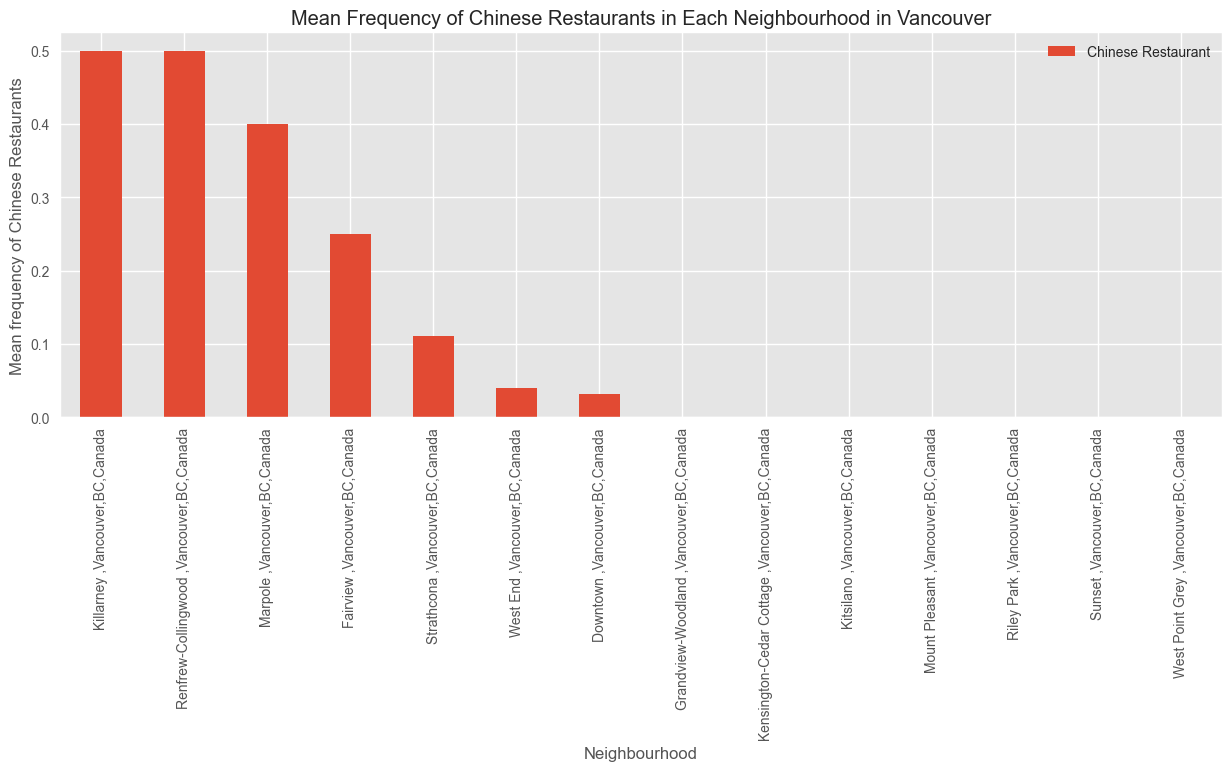

In [256]:
# sort by descending order
vancouver_grouped.sort_values(by=str_cluster +' Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
vancouver_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of ' + str_cluster + ' Restaurants in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of '+ str_cluster+' Restaurants')

plt.show()

## Plotting a bar graph to illustrate the distribution of Chinese population group in each neighbourhood

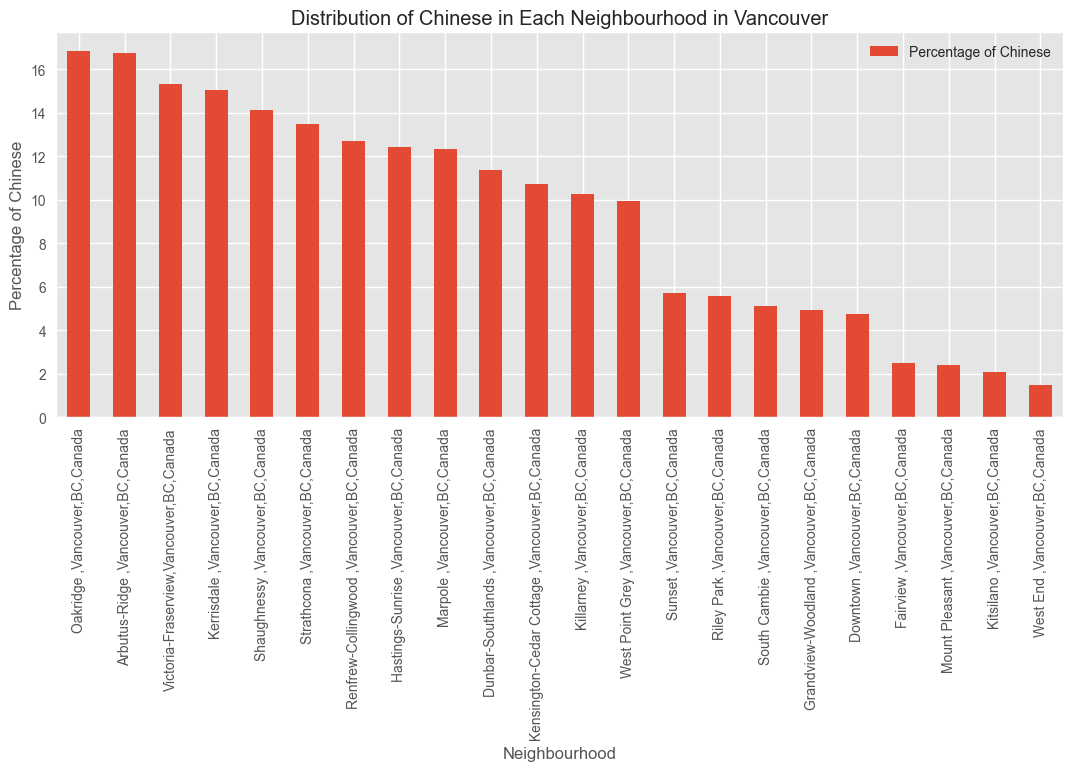

In [257]:
df_ethnic = df_new[['Neighbourhood', percentage_people]].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by=percentage_people, ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of '+str_cluster+' in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel(percentage_people)

plt.show()

## # Plotting a bar graph to illustrate the distribution of the income in each neighbourhood

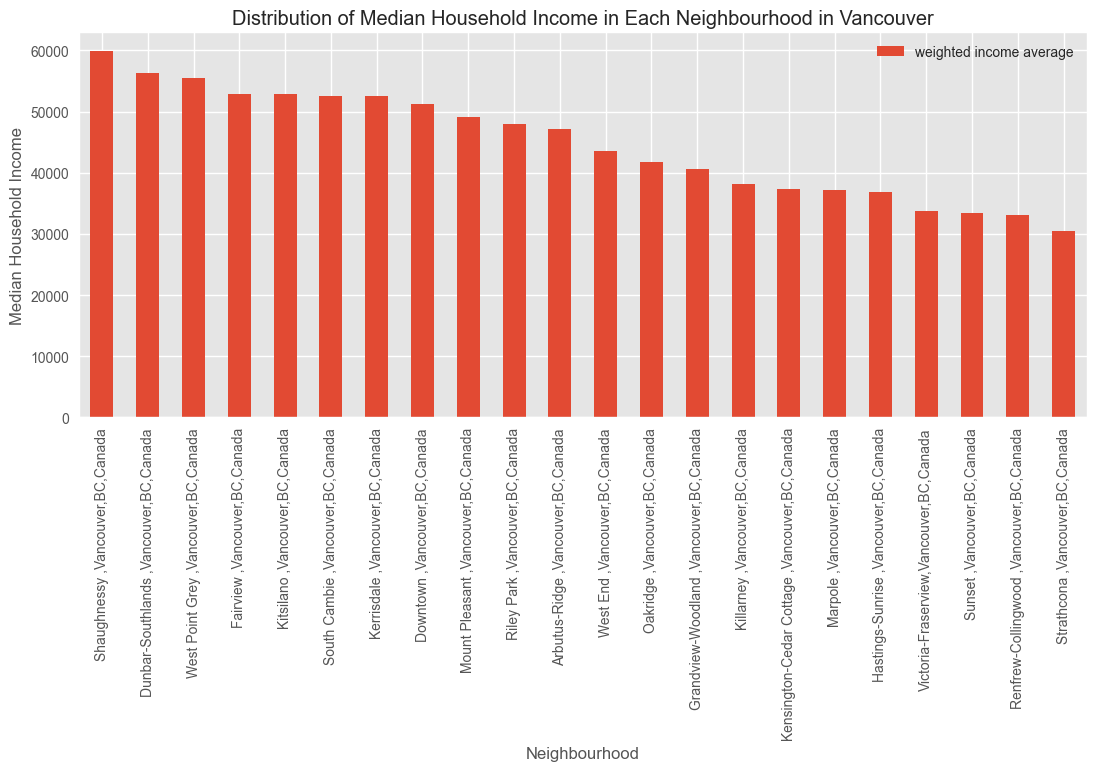

In [258]:
df_income = df_new[['Neighbourhood', 'weighted income average']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='weighted income average', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

# Cluster Neighbourhoods

In [280]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df_final.values[:,3:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.00802528, -0.5483412 , -0.52361927],
       [ 1.20591194, -1.09502673,  0.63157305],
       [-0.29663863, -0.5032965 , -0.69475888],
       [-0.70714481,  0.87396128, -0.69475888],
       [-0.61606817,  0.7624765 ,  1.95790497],
       [ 1.19668459, -1.19318465, -0.69475888],
       [-0.73226756,  1.25703006,  1.4273722 ],
       [ 0.73189841, -1.1139612 , -0.69475888],
       [-1.24099849,  1.34569023,  1.95790497],
       [ 0.60115907, -0.35503456, -0.69475888],
       [-1.54602625,  1.53665892, -0.10527802],
       [-1.19438807, -0.32669291, -0.69475888],
       [ 0.0614133 , -1.33183848, -0.48254577],
       [ 1.5284394 ,  0.69155923, -0.69475888]])

In [281]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'weighted income average', 1:'% '+str_cluster, 2:'No. of '+str_cluster+ ' Restaurants'}, inplace=True)
df_normalized.head()

,weighted income average,% Chinese,No. of Chinese Restaurants
0,1.008025,-0.548341,-0.523619
1,1.205912,-1.095027,0.631573
2,-0.296639,-0.503297,-0.694759
3,-0.707145,0.873961,-0.694759
4,-0.616068,0.762477,1.957905


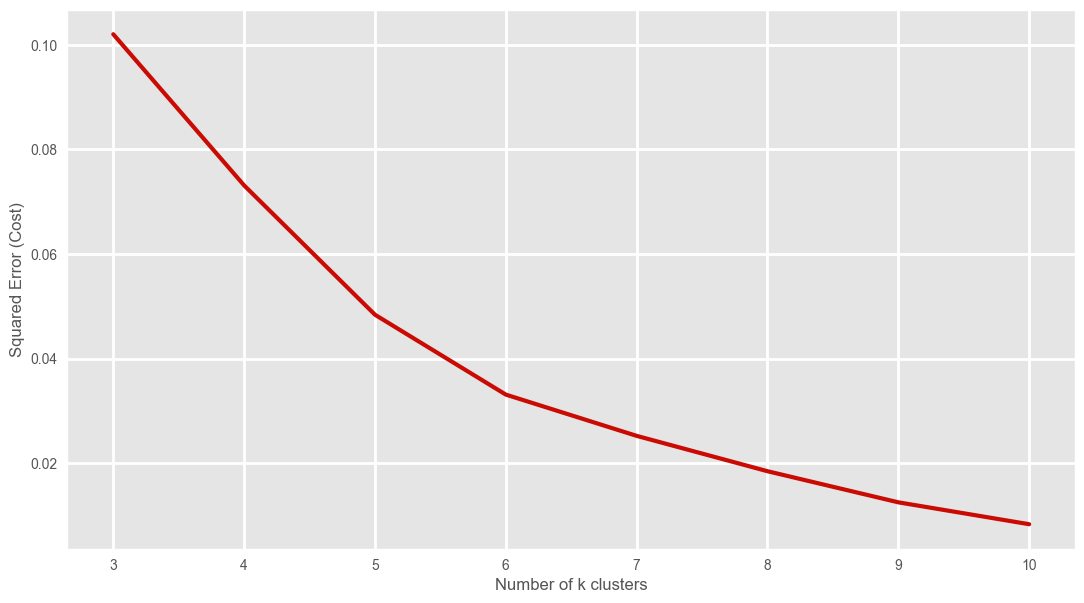

In [282]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=10), k=(3, 11))

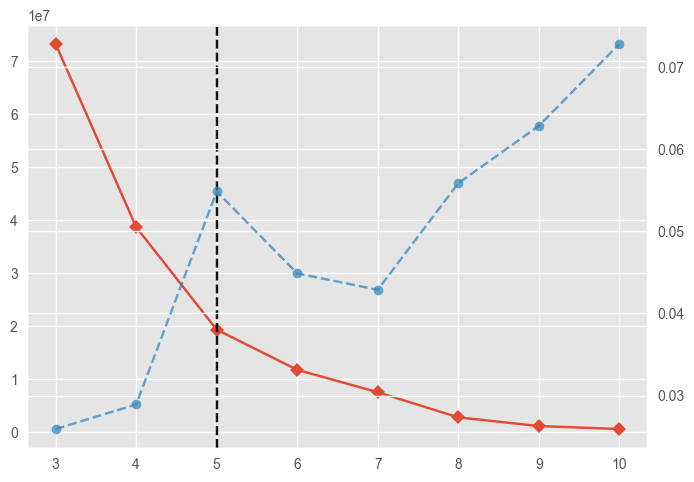

In [285]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer

In [286]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 1, 0, 1, 0, 1, 0])

In [287]:
df_normalized.drop(['weighted income average','% '+str_cluster], axis=1, inplace=True)
df_clustered = pd.merge(df_x, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)

In [288]:
df_clustered.head()

,Cluster Label,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
0,0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198,-0.523619
1,0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208,0.631573
2,0,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515,-0.694759
3,2,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782,-0.694759
4,1,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299,1.957905


In [289]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['latitude'], df_clustered['longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [290]:
# examine clusters

In [291]:
# Cluster 0
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
0,0,"Arbutus-Ridge ,Vancouver,BC,Canada",49.246213,-123.161262,16.75063,47217.03198,-0.523619
1,0,"Downtown ,Vancouver,BC,Canada",49.283393,-123.117456,4.766669,51284.256208,0.631573
2,0,"Dunbar-Southlands ,Vancouver,BC,Canada",49.237069,-123.184365,11.384615,56365.998515,-0.694759
5,0,"Hastings-Sunrise ,Vancouver,BC,Canada",49.278752,-123.040006,12.424674,36934.324866,-0.694759
7,0,"Kerrisdale ,Vancouver,BC,Canada",49.220985,-123.159548,15.03017,52571.375603,-0.694759
9,0,"Kitsilano ,Vancouver,BC,Canada",49.269410,-123.155267,2.068392,52816.779837,-0.694759
12,0,"Oakridge ,Vancouver,BC,Canada",49.230829,-123.131134,16.852709,41807.756464,-0.482546


In [292]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
4,1,"Grandview-Woodland ,Vancouver,BC,Canada",49.277139,-123.066901,4.955154,40686.166299,1.957905
6,1,"Kensington-Cedar Cottage ,Vancouver,BC,Canada",49.247632,-123.084207,10.718138,37351.52864,1.427372
8,1,"Killarney ,Vancouver,BC,Canada",49.224274,-123.046250,10.251642,38091.365462,1.957905


In [293]:
# Cluster 2
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
3,2,"Fairview ,Vancouver,BC,Canada",49.261956,-123.130351,2.479123,52891.735782,-0.694759
10,2,"Marpole ,Vancouver,BC,Canada",49.209223,-123.136150,12.321048,37147.45062,-0.105278
11,2,"Mount Pleasant ,Vancouver,BC,Canada",49.263330,-123.096588,2.399894,49041.213064,-0.694759


In [294]:
# Cluster 3
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,latitude,longitude,Percentage of Chinese,weighted income average,No. of Chinese Restaurants
13,3,"Renfrew-Collingwood ,Vancouver,BC,Canada",49.248495,-123.040353,12.692037,33014.910426,-0.694759
